In [3]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import KBinsDiscretizer

airbnb_data = pd.read_csv('xlsx-csv/AB_NYC_2019.csv')
# updated_data = airbnb_data[['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'number_of_reviews']]
# updated_data = pd.get_dummies(updated_data)
# print(updated_data)

FileNotFoundError: [Errno 2] File xlsx-csv/AB_NYC_2019.csv does not exist: 'xlsx-csv/AB_NYC_2019.csv'

In [296]:
X = airbnb_data[['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
# convert categorigcal variables to numeric via one-hot encoding
X = pd.get_dummies(X)
# divide number_of_reviews into bins to get different classifications
# airbnb_data['reviews_bins'] = pd.qcut(x=airbnb_data['number_of_reviews'], q=4, labels=['0-1', '2-5', '6-24', '25-629'])
# airbnb_data['reviews_bins'] = numpy.array_split(ary = airbnb_data['number_of_reviews'], indices_or_sections=5)
airbnb_data['reviews_bins'] = pd.cut(x=airbnb_data['number_of_reviews'], bins=[-1, 100, 200, 300, 400, 500, 650], labels=[0, 1, 2, 3, 4, 5])
y = airbnb_data.reviews_bins
print(X)
print(y)
# print(airbnb_data.iloc[264,:])

             id   host_id  price  neighbourhood_group_Bronx  \
0          2539      2787    149                          0   
1          2595      2845    225                          0   
2          3647      4632    150                          0   
3          3831      4869     89                          0   
4          5022      7192     80                          0   
...         ...       ...    ...                        ...   
48890  36484665   8232441     70                          0   
48891  36485057   6570630     40                          0   
48892  36485431  23492952    115                          0   
48893  36485609  30985759     55                          0   
48894  36487245  68119814     90                          0   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                                 1                              0   
1                                 0                              1   
2                                

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

NameError: name 'train_test_split' is not defined

In [214]:
DTree = DecisionTreeClassifier(min_samples_split=1000)
DTree.fit(X_train, y_train)
y_pred = DTree.predict(X_test)

print('Accuracy Score using Decision Tree:', accuracy_score(y_true=y_test, y_pred=y_pred))
print('Confusion Matrix of test data: \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('Decision Tree Classification report:\n\n', classification_report(y_true=y_test, y_pred=y_pred))

Accuracy Score using Decision Tree: 0.9369273560209425
Confusion Matrix of test data: 
 [[11451    19     1     0     4     0]
 [  605     2     1     0     0     0]
 [  115     0     0     0     0     0]
 [   18     0     0     0     0     0]
 [    7     0     0     0     0     0]
 [    1     0     0     0     0     0]]
Decision Tree Classification report:

               precision    recall  f1-score   support

           0       0.94      1.00      0.97     11475
           1       0.10      0.00      0.01       608
           2       0.00      0.00      0.00       115
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1

    accuracy                           0.94     12224
   macro avg       0.17      0.17      0.16     12224
weighted avg       0.89      0.94      0.91     12224



c:\users\namra\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


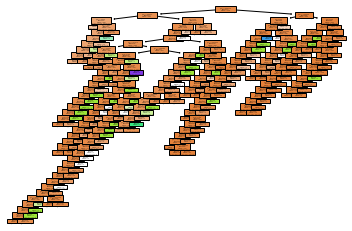

In [215]:
plot_tree(DTree, filled=True)
plt.show()

In [1]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import auc
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

y = label_binarize(y, classes=[0,1,2,3,4,5])
n_classes = 6
print(type(y))
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)
# print(np.array(X_train), np.array(y_train))
# Learn to predict each class against the other
classifier = OneVsRestClassifier(MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=100))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
precision = dict()
recall = dict()
auc_score = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    auc_score[i] = auc(recall[i], precision[i])
print(auc_score)
# Plot of a ROC curve for a specific class
for i in range(n_classes):    
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    plt.plot(recall[i], precision[i], marker='.')
    plt.show()


NameError: name 'y' is not defined

In [344]:
print('original target data y: \n', y, len(y), type(y))
print('\n test target data y_test: \n', y_test, len(y_test), type(y_test))
print('\n predicted target data y_score: \n', y_score, len(y_test), type(y_test))
print('Accuracy Score using MLP:', classifier.score(X_test, y_test))
# print('MLP Classification report:\n\n', classification_report(y_test, y_score))

original target data y: 
 [[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]] 48895 <class 'numpy.ndarray'>

 test target data y_test: 
 [[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]] 12224 <class 'numpy.ndarray'>

 predicted target data y_score: 
 [[9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 ...
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]] 12224 <class 'numpy.ndarray'>
Accuracy Score using MLP: 0.9387270942408377


In [322]:
# from sklearn.svm import LinearSVC
# from sklearn.preprocessing import label_binarize

# y = label_binarize(y, classes=[0,1,2,3,4,5])
# n_classes = 6

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

# clf = OneVsRestClassifier(LinearSVC(random_state=0))
# y_score = clf.fit(X_train, y_train).decision_function(X_test)
# print(y_score)

c:\users\namra\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\namra\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\namra\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\namra\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\namra\appdata\local\program

[[ 4.67442284e-01 -2.27510189e+00 -1.70310505e+00 -9.51692078e+01
  -9.69168540e+02 -2.34095472e+03]
 [-2.29276159e-01 -2.20306971e+00 -1.68713632e+00 -3.31027348e+01
  -3.42576617e+02 -8.17728048e+02]
 [ 1.08776664e-01 -1.91256988e+00 -1.61092262e+00 -5.41843734e+00
  -5.34730524e+01 -1.19331394e+02]
 ...
 [-7.90238068e+01 -2.75163497e+01 -5.48893981e+00  1.19580014e+02
   5.49842040e+01  6.42417585e+02]
 [ 6.69419070e+00 -9.56560709e-02 -1.01506955e+00 -1.79896665e+02
  -1.74639024e+03 -4.26718873e+03]
 [-5.48479939e+01 -1.92629205e+01 -3.94676011e+00  8.26795403e+01
   3.49510519e+01  4.39028030e+02]]


(array([0., 1.]), array([0., 1.]), array([1.93906508, 0.93906508]))
(array([0., 1.]), array([0., 1.]), array([1.0479773, 0.0479773]))
(array([0.00000000e+00, 8.25832026e-05, 3.30332810e-04, 1.00000000e+00]), array([0., 0., 0., 1.]), array([1.01052447, 0.01052447, 0.01052447, 0.01052447]))
(array([0.00000000e+00, 8.19269212e-05, 3.27707685e-04, 1.00000000e+00]), array([0., 0., 0., 1.]), array([1.00213699, 0.00213699, 0.00213699, 0.00213699]))
(array([0.00000000e+00, 5.72972088e-04, 9.99754441e-01, 9.99754441e-01,
       1.00000000e+00]), array([0.        , 0.        , 0.85714286, 1.        , 1.        ]), array([1.00248795e+00, 2.48795090e-03, 8.42539132e-04, 8.42539132e-04,
       8.42539132e-04]))
(array([0.        , 0.99967275, 1.        ]), array([0., 1., 1.]), array([1.00051816e+00, 5.18158575e-04, 5.18158575e-04]))
{0: 0.5, 1: 0.5, 2: 0.4998348335948468, 3: 0.4998361461576274, 4: 0.4284661888001497, 5: 0.5001636259510758}


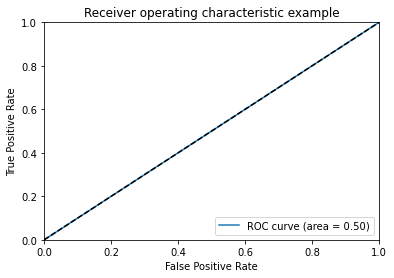

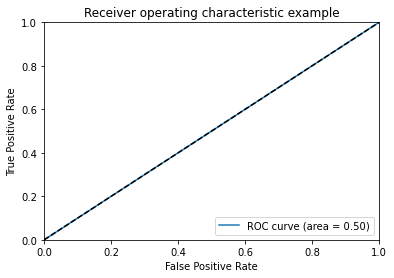

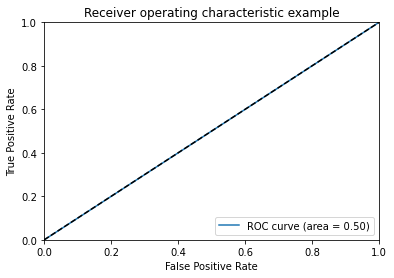

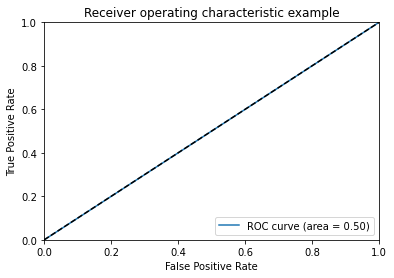

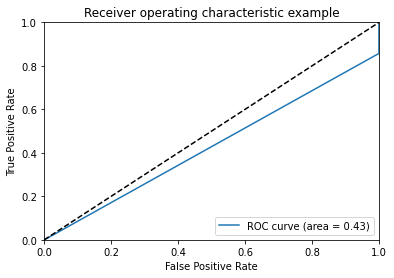

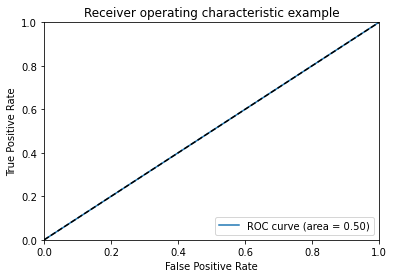

In [348]:
from sklearn.metrics import auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_curve(y_test[:, i], y_score[:, i]))
print(roc_auc)
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [336]:
from sklearn.metrics import auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(fpr[i])
# print(fpr)
# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# print(roc_auc["micro"])

[0. 1.]
[0. 1.]
[0.00000000e+00 8.25832026e-05 3.30332810e-04 1.00000000e+00]
[0.00000000e+00 8.19269212e-05 3.27707685e-04 1.00000000e+00]
[0.00000000e+00 5.72972088e-04 9.99754441e-01 9.99754441e-01
 1.00000000e+00]
[0.         0.99967275 1.        ]


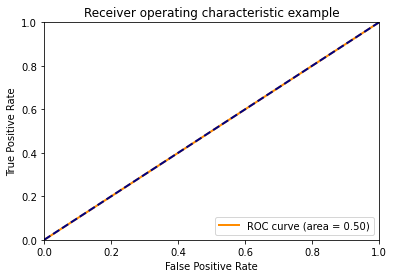

In [340]:
plt.figure()
lw = 2
plt.plot(fpr[3], tpr[3], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [318]:
# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs1 = classifier.predict_proba(X_test)
# lr_probs2 = clf2.predict_proba(X_test)
print('probabilities: \n', lr_probs1)
# keep probabilities for the positive outcome only
# lr_probs1 = lr_probs1[:, 1]
# lr_probs2 = lr_probs2[:, 1]
# print('prob for +ve outcomes: \n', lr_probs1)
print(y_test)


probabilities: 
 [[9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 ...
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]
 [9.39065080e-01 4.79773003e-02 1.05244667e-02 2.13699143e-03
  8.42539132e-04 5.18158575e-04]]
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]]


In [319]:
# y_test1 = y_test.tolist()
print(y_test, type(y_test), len(y_test))
ns_probs1 = np.array(ns_probs)
print(ns_probs1, type(ns_probs1), len(ns_probs1))
# calculate accuracy score for random prediction model
# ns_auc = roc_auc_score(y_test, ns_probs1) #roc_auc_score(y_test, ns_probs)

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
# lr_auc2 = roc_auc_score(y_test, lr_probs2) fpr2, tpr2, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('MLP 1 (hidden layer sizes=5): ROC AUC=%.3f' % (lr_auc1))
# print('MLP 2 (hidden layer sizes=10): ROC AUC=%.3f' % (lr_auc2))

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 ...
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]] <class 'numpy.ndarray'> 12224
[0 0 0 ... 0 0 0] <class 'numpy.ndarray'> 12224
Baseline (random guess): ROC AUC=0.500
MLP 1 (hidden layer sizes=5): ROC AUC=0.488


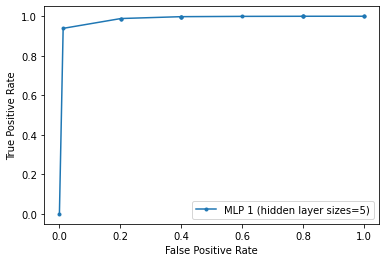

In [323]:
# calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test.ravel(), lr_probs1.ravel())
# lr_fpr2, lr_tpr2, _ = roc_curve(y_test1, lr_probs2)

# plot the roc curve for the model
# plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='MLP 1 (hidden layer sizes=5)')
# plt.plot(lr_fpr2, lr_tpr2, marker='.', label='MLP 2 (hidden layer sizes=10)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
